In [ ]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#leemos el conjunto de datos:
pedido_app = pd.read_csv('/content/drive/MyDrive/Tripleten/datasets/instacart_orders.csv', sep=';') #orders

producto = pd.read_csv('/content/drive/MyDrive/Tripleten/datasets/products.csv', sep=';') #product

articulo = pd.read_csv('/content/drive/MyDrive/Tripleten/datasets/order_products.csv', sep=';') #order_products

aisles = pd.read_csv('/content/drive/MyDrive/Tripleten/datasets/aisles.csv', sep=';') #aisles

departamentos = pd.read_csv('/content/drive/MyDrive/Tripleten/datasets/departments.csv', sep=';') #departments

In [ ]:
#mostramos información de cada dataframe

pedido_app.info()

pedido_app.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
producto.info()

producto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
 4   name_upper     48436 non-null  object
 5   product_upper  48436 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


,product_id,product_name,aisle_id,department_id,name_upper,product_upper
0,1,CHOCOLATE SANDWICH COOKIES,61,19,CHOCOLATE SANDWICH COOKIES,CHOCOLATE SANDWICH COOKIES
1,2,ALL-SEASONS SALT,104,13,ALL-SEASONS SALT,ALL-SEASONS SALT
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7,ROBUST GOLDEN UNSWEETENED OOLONG TEA,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,5,GREEN CHILE ANYTIME SAUCE,5,13,GREEN CHILE ANYTIME SAUCE,GREEN CHILE ANYTIME SAUCE


In [ ]:
articulo.info()

articulo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [ ]:
aisles.info()

aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departamentos.info()

departamentos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
#verifica y corrige los tipos de datos

pedido_app = pedido_app.astype({'order_id' : 'int64',
                                'user_id' : 'int64',
                                'order_number' : 'int64',
                                'order_dow' : 'int64',
                                'order_hour_of_day' : 'int64',
                                'days_since_prior_order' : 'float64'})

# identificamos y completamos los valores usentes que identificamos previamente en
#la columna days_since_prior_order
pedido_app['days_since_prior_order'] = pedido_app['days_since_prior_order'].fillna(0)

#validamos que ya no se tengan valores ausentes
pedido_app.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


In [ ]:
#verificamos si existen duplicados
pedido_app.duplicated().sum()

np.int64(15)

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

#de acuerdo con la descripión del archivo, tenemos que 0 = domínog, por lo tanto 3 = miércoles
#la columna 'order_hour_of_day', esta en formato militar, por lo que estamos buscando el 2, que corresponde a las 2 am

miercoles_2_pedidos = pedido_app[(pedido_app['order_dow'] == 3) & (pedido_app['order_hour_of_day'] == 2)]

#validamos el filtrado que acabamos de realziar

miercoles_2_pedidos.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


In [ ]:
#eliminamos los pedidos duplicados
pedido_app.drop_duplicates(inplace = True)

#verificamos si existen duplicados
pedido_app.duplicated().sum()

np.int64(0)

In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

pedido_app.duplicated(subset = 'order_id').sum()

np.int64(0)

In [ ]:
#verifica si hay filas totalmente duplicadas en el dataframe de producto

producto.duplicated(keep = False).sum()

np.int64(0)

In [ ]:
# Revisa únicamente si hay ID de productos duplicados
producto.duplicated(subset = 'product_id').sum()

np.int64(0)

In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

#creamos una columna temporal para almacenar la información del nombre en mayuscula:
producto['product_upper'] = producto['product_name'].str.upper()

#buscamos duplicados por el nombre
duplicados_productos = producto[producto.duplicated(subset = 'product_upper', keep = False)]

#mostramos los duplicados
duplicados_productos.sort_values('product_upper')

,product_id,product_name,aisle_id,department_id,product_upper
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP
19941,19942,Aged Balsamic Vinegar Of Modena,19,13,AGED BALSAMIC VINEGAR OF MODENA
13152,13153,Aged Balsamic Vinegar of Modena,19,13,AGED BALSAMIC VINEGAR OF MODENA
24830,24831,Albacore Solid White Tuna in Water,95,15,ALBACORE SOLID WHITE TUNA IN WATER
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [ ]:
#verificamos los duplicados:
duplicados_productos.duplicated(subset = 'name_upper').sum()

np.int64(1361)

In [ ]:
#eliminamos los duplicados
producto.drop_duplicates(subset = 'name_upper', keep = False)

#verificamos si existen duplicados
producto.duplicated().sum()

np.int64(0)

In [ ]:
producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
 4   name_upper     48436 non-null  object
 5   product_upper  48436 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes

#fitramos únicamente los productos con nombres duplicados de productos no faltantes
no_null_productos = producto[producto['product_name'].notnull()].copy()

#lo convertimos en mayúsculas
no_null_productos['product_upper'] = no_null_productos['product_name'].str.upper()

#buscamos los duplicados en la variable que acabamos de crear
duplicados_productos_no_null = no_null_productos[no_null_productos.duplicated(subset = 'product_upper', keep = False)]

#mostramos los duplicados
duplicados_productos_no_null.sort_values('product_upper')

,product_id,product_name,aisle_id,department_id,name_upper,product_upper
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13,AGED BALSAMIC VINEGAR OF MODENA,AGED BALSAMIC VINEGAR OF MODENA
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13,AGED BALSAMIC VINEGAR OF MODENA,AGED BALSAMIC VINEGAR OF MODENA
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15,ALBACORE SOLID WHITE TUNA IN WATER,ALBACORE SOLID WHITE TUNA IN WATER
...,...,...,...,...,...,...
46873,46874,VITAMIN D3 5000 IU,47,11,VITAMIN D3 5000 IU,VITAMIN D3 5000 IU
21366,21367,WILD SARDINES IN SPRING WATER,95,15,WILD SARDINES IN SPRING WATER,WILD SARDINES IN SPRING WATER
40093,40094,WILD SARDINES IN SPRING WATER,95,15,WILD SARDINES IN SPRING WATER,WILD SARDINES IN SPRING WATER
1826,1827,YAMS CUT SWEET POTATOES IN SYRUP,81,15,YAMS CUT SWEET POTATOES IN SYRUP,YAMS CUT SWEET POTATOES IN SYRUP


In [ ]:
departamentos.info()

departamentos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
# Revisa si hay filas totalmente duplicadas

departamentos.duplicated().sum()

np.int64(0)

In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos

departamentos.duplicated(subset = 'department_id').sum()

np.int64(0)

In [ ]:
aisles.info()

aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

# Revisa únicamente si hay IDs duplicadas de pasillos

aisles.duplicated(subset = 'aisle_id').sum()

np.int64(0)

In [ ]:
articulo.info()

articulo.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [ ]:
# Revisa si hay filas totalmente duplicadas
articulo.duplicated().sum()

np.int64(0)

In [ ]:
#revisar duplicados engañosos, mismas claves, otras columnas:

dup_subset = articulo[articulo.duplicated(subset = ['order_id', 'product_id'], keep = False)]

print(dup_subset.shape)




(0, 4)


Encuentra y elimina los valores ausentes
Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:
* La columna 'product_name' de la tabla products.
* La columna 'days_since_prior_order' de la tabla orders.
* La columna 'add_to_cart_order' de la tabla order_productos.


In [ ]:
producto.head()

,product_id,product_name,aisle_id,department_id,product_upper
0,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES
1,2,All-Seasons Salt,104,13,ALL-SEASONS SALT
2,3,Robust Golden Unsweetened Oolong Tea,94,7,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,5,Green Chile Anytime Sauce,5,13,GREEN CHILE ANYTIME SAUCE


In [ ]:
#Encuentra los valores ausentes en la columna 'product_name'
faltantes_productos = producto['product_name'].isnull().sum()

print(faltantes_productos)

1258


In [ ]:
#validar si los faltantes corresponden al aisle_id=100

faltantes_aisle = producto[producto['aisle_id'] == 100]

faltantes_aisle

,product_id,product_name,aisle_id,department_id,product_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(aisles[aisles['aisle_id'] == 100])
print(departamentos[departamentos['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [ ]:
#validar si los faltantes corresponden al departamento ID 21
faltantes_departamentos = producto[producto['department_id'] == 21]

faltantes_departamentos

,product_id,product_name,aisle_id,department_id,product_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [ ]:
#Completa los nombres de los productos ausentes con 'Unknown'
#para evitar la perdida de información hacemos un respaldo previo a la sustitución del nombre
producto_backup = producto.copy()

#Ahora si rellenamos los campos
producto['product_name'] = producto['product_name'].fillna('Unknown')

#validamos que hemos realizado el remplazo
faltantes_productos_remplazo = producto['product_name'].isnull().sum()

print(faltantes_productos_remplazo)

0


In [ ]:
pedido_app.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
#encuentra los valores ausentes
valores_ausentes= pedido_app.isnull().sum()

print(valores_ausentes)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente

valores_ausentes = pedido_app.groupby('user_id')['days_since_prior_order'].transform(lambda x: x.isnull().any())

print(valores_ausentes)

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965     True
478966    False
Name: days_since_prior_order, Length: 478967, dtype: bool


In [ ]:
#valores máximos y minimos en la columna 'days_since_prior_order'

max_min_pedidos = pedido_app['days_since_prior_order'].agg(['max', 'min'])

print(max_min_pedidos)

max    30.0
min     0.0
Name: days_since_prior_order, dtype: float64


In [ ]:
articulo.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

pedido_ausente = articulo[articulo['add_to_cart_order'].isnull()]

print(pedido_ausente)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

#primero vamos a contar el número de productos por pedido

productos_per_order = pedido_ausente.groupby('order_id')['product_id'].count()

print(productos_per_order)


order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64


In [ ]:
#agrupamos los pedidos con datos ausentes por el ID del pedido
pedido_ausente_grouped = pedido_ausente.groupby('order_id')

In [ ]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

min_products_per_order = pedido_ausente_grouped['product_id'].count().min()

print(min_products_per_order)

1


In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.

#creamos una copia para evitar perdida de información
articulo_backup = articulo.copy()

#realizamos el remplazo:
articulo['add_to_cart_order'] = articulo['add_to_cart_order'].fillna(999).astype(int)

#validamos que se hayan sustituido correctamente
articulo['add_to_cart_order'].isnull().sum()


np.int64(0)

Verifica que los valores sean razonables

Queremos confirmar que:
* order_hour_of_day esté entre 0 y 23

* order_dow esté entre 0 y 6

In [ ]:
#verificar que los valores sean razonables
# verificar que 'order_hour_of_day' este entre 0 y 23
print("Min order_hour_of_day:", pedido_app['order_hour_of_day'].min())
print("Max order_hour_of_day:", pedido_app['order_hour_of_day'].max())

Min order_hour_of_day: 0
Max order_hour_of_day: 23


In [ ]:
# verificar que 'order_dow' oscile entre 0 y 6
print("Min order_dow:", pedido_app['order_dow'].min())
print("Max order_dow:", pedido_app['order_dow'].max())


Min order_dow: 0
Max order_dow: 6


/tmp/ipython-input-2403542508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = orders_by_hour.index, y = orders_by_hour.values, palette = 'viridis')


<Axes: xlabel='order_hour_of_day'>

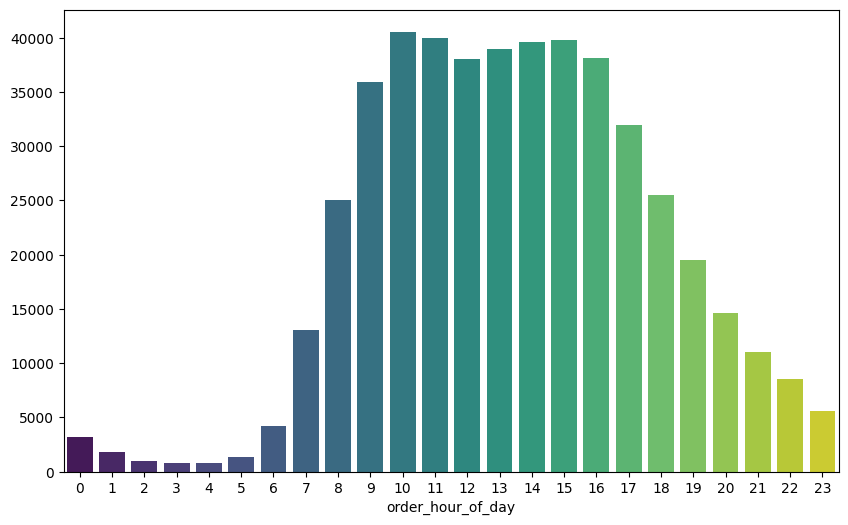

In [ ]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

#debemos contar los pedidos por hora:

orders_by_hour = pedido_app['order_hour_of_day'].value_counts().sort_index()

#creamos el gráfico
plt.figure(figsize = (10, 6))
sns.barplot(x = orders_by_hour.index,
            y = orders_by_hour.values,
            palette = 'viridis')

In [ ]:
pedido_app.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


/tmp/ipython-input-556046092.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = orders_by_dow.index,


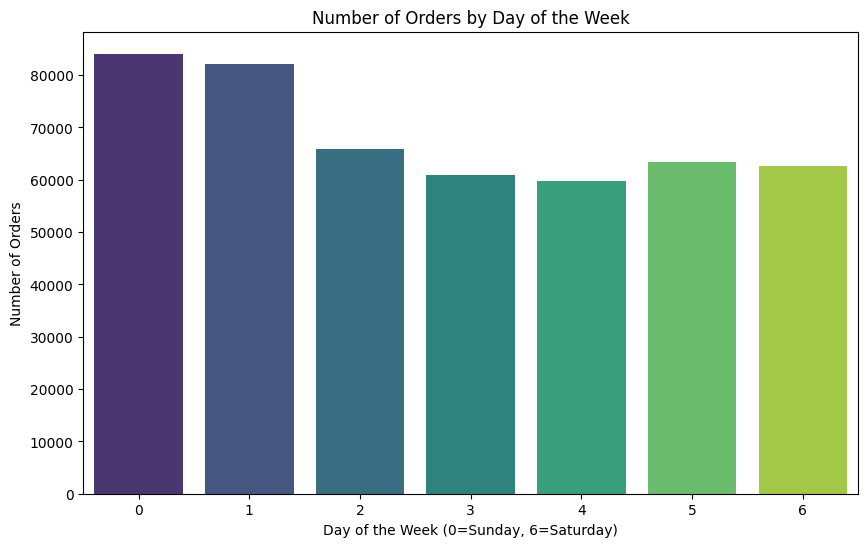

In [ ]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

#contamos los pedidos por día de la semana

orders_by_dow = pedido_app['order_dow'].value_counts().sort_index()

#creamos el gráfico
plt.figure(figsize = (10, 6))
sns.barplot(x = orders_by_dow.index,
            y = orders_by_dow.values,
            palette = 'viridis')

plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Number of Orders')
plt.show()

Min days since prior order: 0.0
Max days since prior order: 30.0


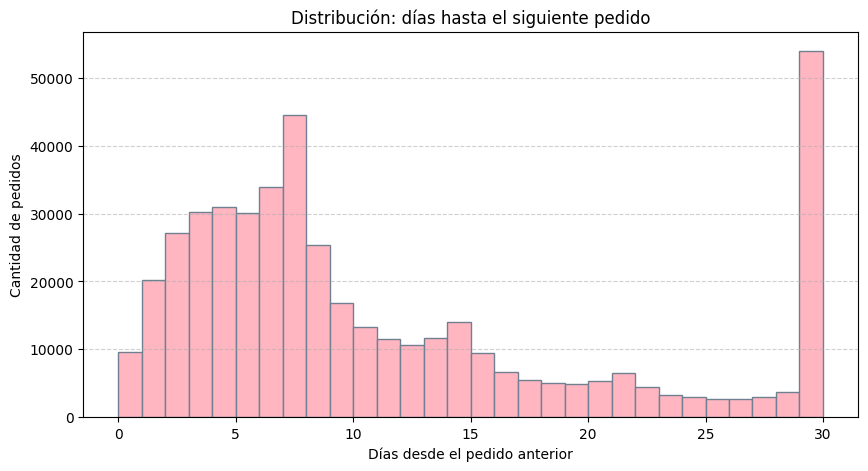

In [ ]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

#valores mínimos y máximos

min_days = pedido_app['days_since_prior_order'].min()
max_days = pedido_app['days_since_prior_order'].max()

print("Min days since prior order:", min_days)
print("Max days since prior order:", max_days)

#realizamos el gráfico con los datos obtenidos
plt.figure(figsize=(10,5))
plt.hist(pedido_app['days_since_prior_order'], bins=30, color='lightpink', edgecolor='slategray')
plt.title("Distribución: días hasta el siguiente pedido")
plt.xlabel("Días desde el pedido anterior")
plt.ylabel("Cantidad de pedidos")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
print("Valores únicos atípicos (si existen):")
print("Horas inválidas:", pedido_app.loc[(pedido_app['order_hour_of_day'] < 0) | (pedido_app['order_hour_of_day'] > 23)])
print("Días inválidos:", pedido_app.loc[(pedido_app['order_dow'] < 0) | (pedido_app['order_dow'] > 6)])
print("Días hasta pedido inválidos:", pedido_app.loc[(pedido_app['days_since_prior_order'] < 0)])

Valores únicos atípicos (si existen):
Horas inválidas: Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Días inválidos: Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Días hasta pedido inválidos: Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [ ]:
hourly_orders = pedido_app.groupby('order_hour_of_day')['order_id'].nunique().reset_index(name='num_orders')

print(hourly_orders.min())
print()
print(hourly_orders.max())
print()
print(hourly_orders)

order_hour_of_day      0
num_orders           765
dtype: int64

order_hour_of_day       23
num_orders           40578
dtype: int64

    order_hour_of_day  num_orders
0                   0        3180
1                   1        1763
2                   2         989
3                   3         770
4                   4         765
5                   5        1371
6                   6        4215
7                   7       13043
8                   8       25024
9                   9       35896
10                 10       40578
11                 11       40032
12                 12       38034
13                 13       39007
14                 14       39631
15                 15       39789
16                 16       38112
17                 17       31930
18                 18       25510
19                 19       19547
20                 20       14624
21                 21       11019
22                 22        8512
23                 23        5611


In [ ]:
pedido_app.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
producto.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:

articulo.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


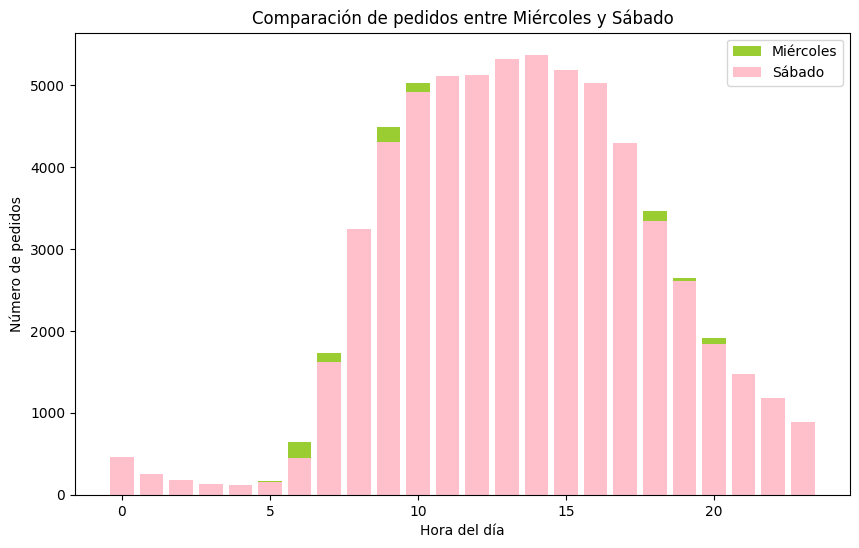

In [ ]:
#Diferencia entre miércoles (3) y sábados(6) para 'order_hour_of_day'
miercoles_orders = pedido_app[pedido_app['order_dow'] == 3]
sabado_orders = pedido_app[pedido_app['order_dow'] == 6]

#conmtamos el número de pedidos por hora para esos días:
miercoles_hourly_orders = miercoles_orders['order_hour_of_day'].value_counts().sort_index()
sabado_hourly_orders = sabado_orders['order_hour_of_day'].value_counts().sort_index()

#Traza gráficos de barra para los dos días y describe las diferencias que veas.
plt.figure(figsize=(10, 6))
plt.bar(miercoles_hourly_orders.index, miercoles_hourly_orders.values, label='Miércoles', color = 'yellowgreen')
plt.bar(sabado_hourly_orders.index, sabado_hourly_orders.values, label='Sábado', color = 'pink')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Comparación de pedidos entre Miércoles y Sábado')
plt.legend()
plt.show()

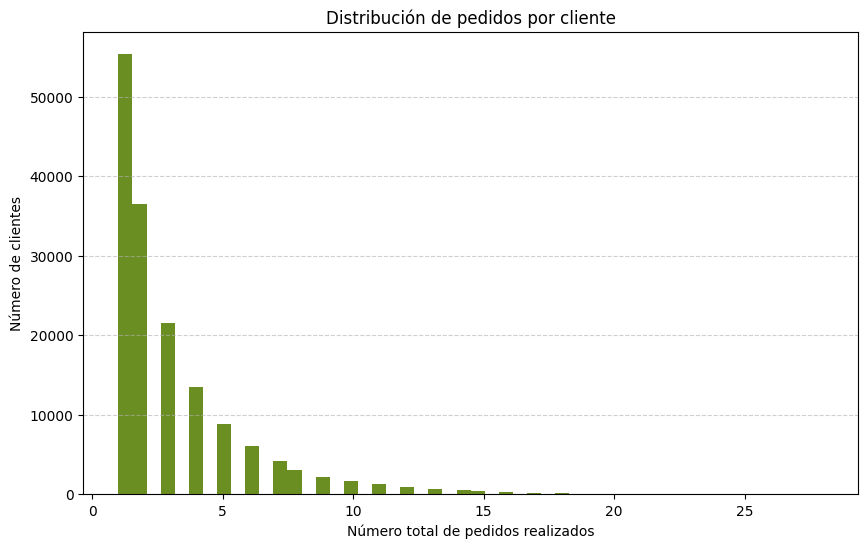

In [ ]:
# ¿Cuál es la distribución para el número de pedidos por cliente?

#contamos el númeor de pedidos por cliente:
ordenes_cliente = pedido_app.groupby('user_id')['order_id'].nunique().reset_index(name='num_orders')

#gráficamos la distribución:
plt.figure(figsize= (10,6))
plt.hist(ordenes_cliente['num_orders'], bins = 50, color = 'olivedrab')
plt.title('Distribución de pedidos por cliente')
plt.xlabel('Número total de pedidos realizados')
plt.ylabel('Número de clientes')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

In [ ]:
#¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

#tenemos que combinar dos tablas ayudandonos del product_id
merged = articulo.merge(producto, on = 'product_id', how = 'left')

#contamos cuantas veces se pidio cada producto
top_productos = merged['product_name'].value_counts().head(20)

#mostramos los resultados
print(top_productos)

product_name
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: count, dtype: int64


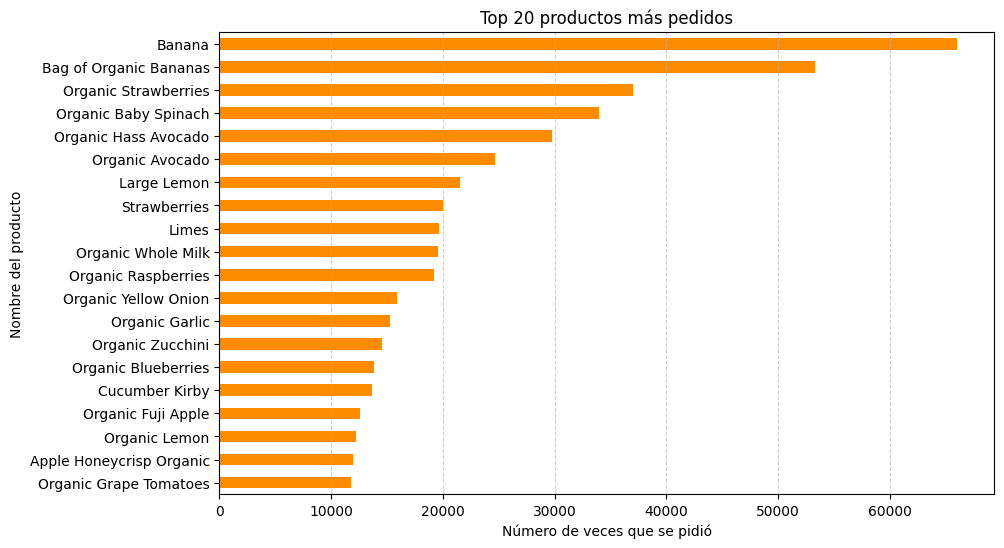

In [ ]:
#gráficamos la tabla

plt.figure(figsize=(10,6))
top_productos.sort_values().plot(kind='barh', color='darkorange')
plt.title('Top 20 productos más pedidos')
plt.xlabel('Número de veces que se pidió')
plt.ylabel('Nombre del producto')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#cantidad de artículos que suelen comprar las perosnas en un pedido?
articulos_por_orden = articulo.groupby('order_id')['product_id'].nunique()

#mostramos el resultado
print(articulos_por_orden.describe())


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


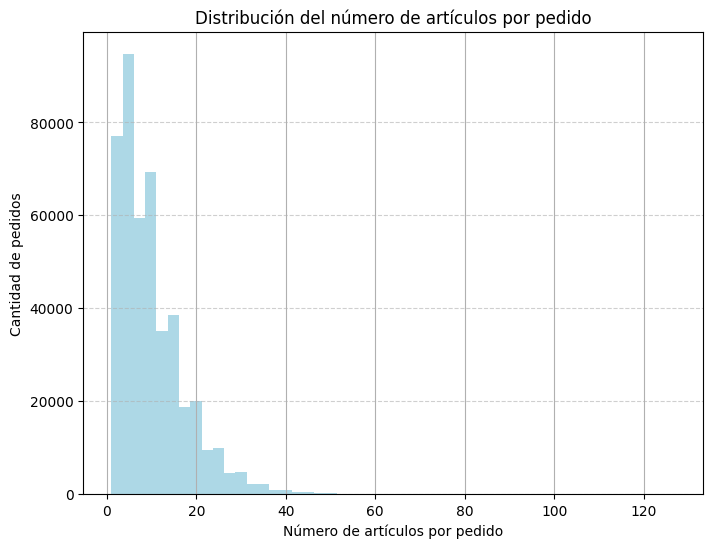

In [ ]:
#realizamos un histograma con la información obtenida

articulos_por_orden.hist(figsize= (8, 6),
                         bins = 50,
                         color = 'lightblue')

plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Cantidad de pedidos')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

In [ ]:
#20 principales a´rticulos que se vuelven a pedir con mayor frecuencia

#primero realizamos el filtrado de los productos que se vuelven a pedir
reordered_products = articulo.groupby('product_id')['reordered'].sum().sort_values(ascending=False)

#tomamos únicamente los primeros 20 valores y los guardamos en una nueva variable (No contienen el nombre)
top_reordered = reordered_products.head(20).reset_index()

#agregamos el nombre haciendo un merge y guardandolo en la misma varibale
top_reordered = top_reordered.merge(producto[['product_id', 'product_name']], on='product_id', how='left')

#mostramos los resultados
print(top_reordered)



    product_id  reordered              product_name
0        24852      55763                    Banana
1        13176      44450    Bag of Organic Bananas
2        21137      28639      Organic Strawberries
3        21903      26233      Organic Baby Spinach
4        47209      23629      Organic Hass Avocado
5        47766      18743           Organic Avocado
6        27845      16251        Organic Whole Milk
7        47626      15044               Large Lemon
8        27966      14748       Organic Raspberries
9        16797      13945              Strawberries
10       26209      13327                     Limes
11       22935      11145      Organic Yellow Onion
12       24964      10411            Organic Garlic
13       45007      10076          Organic Zucchini
14       49683       9538            Cucumber Kirby
15       28204       8989        Organic Fuji Apple
16        8277       8836  Apple Honeycrisp Organic
17       39275       8799       Organic Blueberries
18        58

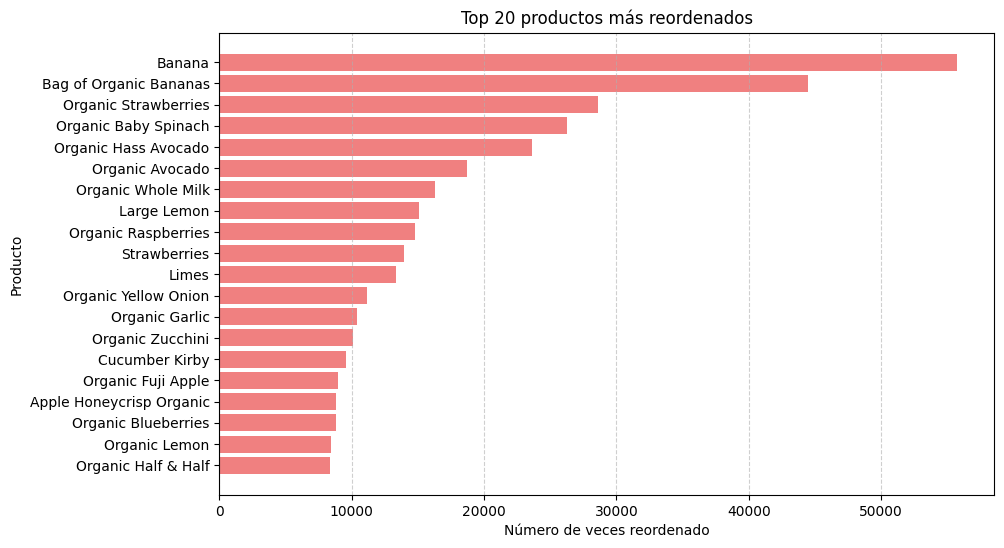

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_reordered['product_name'], top_reordered['reordered'], color='lightcoral')
plt.title("Top 20 productos más reordenados")
plt.xlabel("Número de veces reordenado")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#para cada producto, cual es la proporción de las veces que se pide y que se vuelve a pedir?

#agrupamos el total de pedidos por producto
total_orders_product = articulo.groupby('product_id')['reordered'].count()

#agrupamos el total de reordenes del producto
total_reorders_product = articulo.groupby('product_id')['reordered'].sum()

#calculamos la proporción de reordenes por producto
proportion_reorders = total_reorders_product / total_orders_product

print(proportion_reorders*100)

product_id
1        56.428571
2         0.000000
3        73.809524
4        51.020408
7        50.000000
           ...    
49690    80.000000
49691    43.055556
49692    41.666667
49693    44.000000
49694    33.333333
Name: reordered, Length: 45573, dtype: float64


In [ ]:
#Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

#tenemos que realizar la combinación de DF
merged_df = articulo.merge(pedido_app[['order_id', 'user_id']], on='order_id', how='left')

#Calculamos la tasa de repetición por cliente
cliente_reorder_rate = merged_df.groupby('user_id')['reordered'].mean()

#mostramos los resultados
print(cliente_reorder_rate*100)

user_id
2          3.846154
4          0.000000
5         66.666667
6          0.000000
7         92.857143
            ...    
206203    22.222222
206206    71.428571
206207    89.130435
206208    69.600000
206209    32.000000
Name: reordered, Length: 149626, dtype: float64


In [ ]:
#Los 20 principales artículos que la gente pone primero en sus carritos

#filtramos los artículos que fuerón añadidos primero al carrito
first_added = articulo[articulo['add_to_cart_order'] == 1]

#contamos cuantas veces cada producto fue el primero en ser añadido
first_added_count = first_added['product_id'].value_counts().head(20).reset_index()
first_added_count.columns = ['product_id', 'first_added_count']

#Añadimos el nombre del producto cruzando las tablas
top_first_added = first_added_count.merge(producto[['product_id', 'product_name']], on='product_id', how='left')

#mostramos los resultados
print(top_first_added)

    product_id  first_added_count                 product_name
0        24852              15562                       Banana
1        13176              11026       Bag of Organic Bananas
2        27845               4363           Organic Whole Milk
3        21137               3946         Organic Strawberries
4        47209               3390         Organic Hass Avocado
5        21903               3336         Organic Baby Spinach
6        47766               3044              Organic Avocado
7        19660               2336                 Spring Water
8        16797               2308                 Strawberries
9        27966               2024          Organic Raspberries
10       44632               1914   Sparkling Water Grapefruit
11       49235               1797          Organic Half & Half
12       47626               1737                  Large Lemon
13         196               1733                         Soda
14       38689               1397     Organic Reduced F

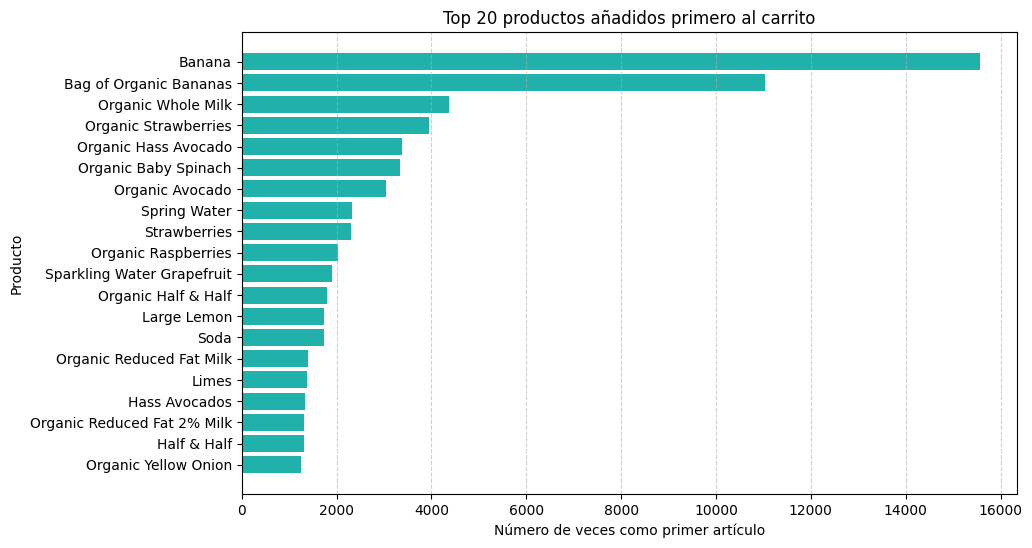

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_first_added['product_name'], top_first_added['first_added_count'], color='lightseagreen')
plt.title("Top 20 productos añadidos primero al carrito")
plt.xlabel("Número de veces como primer artículo")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()